In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pickle
import timeit
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import LatentDirichletAllocation as LDA


# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")
%matplotlib inline

In [2]:
# Load in cleaned dataset of restaurant reviews
reviews = pickle.load( open( "restaurant_reviews_cleaned.pkl", "rb" ) )

In [3]:
reviews.head()

,stars,text,good_bad,language,is_open,length
0,5,love deagans really atmosphere cozy festive sh...,Good,en,1.0,248
1,1,dismal lukewarm defrostedtasting texmex glop m...,Bad,en,0.0,285
2,4,oh happy day finally canes near casa yes other...,Good,en,1.0,501
3,5,definitely favorite fast food sub shop ingredi...,Good,en,1.0,355
4,5,really good place simple decor amazing food gr...,Good,en,1.0,246


In [4]:
reviews_subset = reviews.sample(50000)

# Naive Bayes Classifier

In [48]:
# Creating feature array and target array
def make_xy(reviews, vectorizer=None, min_df=0):    
    if vectorizer is None:
        vectorizer = CountVectorizer(min_df)
    X = vectorizer.fit_transform(reviews.text)
    X = X.tocsc()  # some versions of sklearn return COO format
    
    # Creating numeric target
    target_dict = {'Bad':0, 'Neutral':1, 'Good': 2}
    y = reviews.good_bad.map(target_dict)
    
    return X, y


X, y = make_xy(reviews_subset)

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


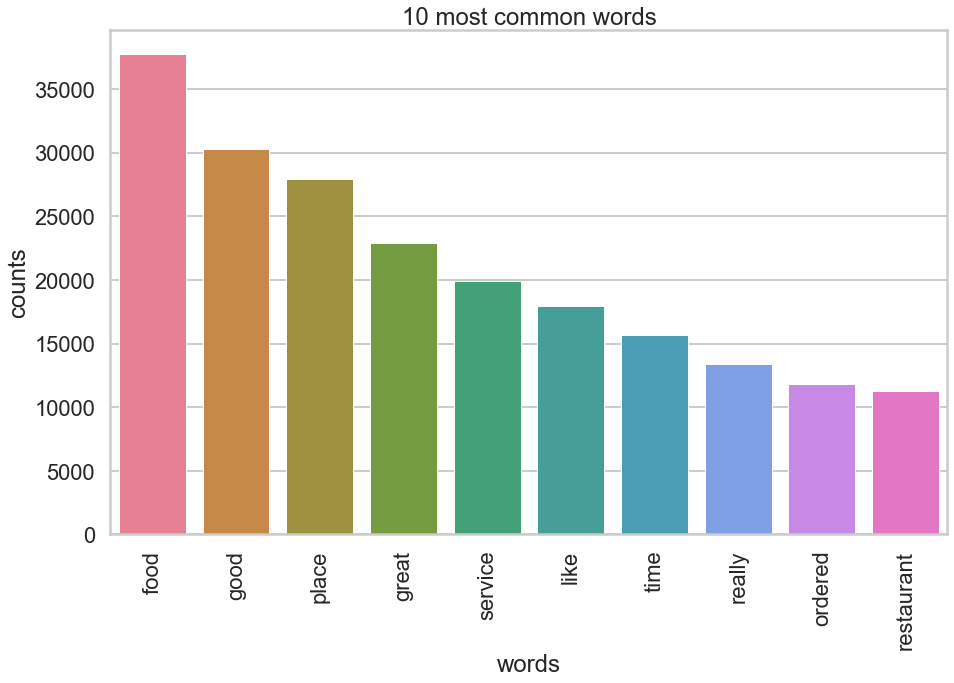

In [38]:


# Plot function
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(reviews_subset.text)

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)


# LDA Model Training

In [43]:

 
# Print function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
food ice place cream like tea service menu better price

Topic #1:
pizza burger good fries like cheese sandwich place salad ordered

Topic #2:
great place food good staff friendly nice bar service love

Topic #3:
good food great place really service steak delicious like dinner

Topic #4:
good tacos fish ordered food really great sushi like chicken

Topic #5:
chicken sauce dish restaurant delicious pasta ordered bread menu dishes

Topic #6:
happy hour like night coffee bar nice place best great

Topic #7:
food order service time minutes came table asked said got

Topic #8:
food service place great good time breakfast best ive vegas

Topic #9:
food good place chicken rice like soup thai restaurant noodles


In [44]:
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
pizza place great good beer tacos like love food bar

Topic #1:
great food service delicious place amazing good friendly best breakfast

Topic #2:
good food chicken place like really ordered sauce rice burger

Topic #3:
food time service order like place came table minutes got

Topic #4:
good great place sushi food service vegas nice really fish


Interestingly enough, most categories seem to be positive in nature. The algorithm is detecting different food topics and separating those out more than it is separating by experience issue/success. 